# Himelblau function

$ z = (x^2 + y - 11)^{2} + (x + y^{2} - 7)^{2} $

Limites en (x, y) > -6 y (x, y) < 6

Min z = 0.000

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand as rand

Initial X is 1.999
Initial Y is 1.750
Initial Z is 31.367
X is 3.000
Y is 2.004
Final OF is 0.000
Best solution: z = (3.000,2.004) = 0.000
Iterations = 500


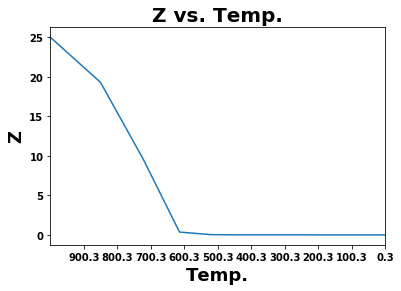

In [50]:
x0 = 6 * rand() # solucion inicial con la que empezaremos
y0 = 6 * rand()

# parametros
k = 0.1 # step operator (k * rand(0.0->1.0))
T0 = 1000
M = 50
N = 10
alpha = 0.85

def obj_func(x, y):
    return ((x**2)+y-11)**2+(x+(y**2)-7)**2

z_int = obj_func(x0, y0)
# best values so far:
x_best = x0
y_best = y0
z_best = z_int
print(f'Initial X is {x0:.3f}')
print(f'Initial Y is {y0:.3f}')
print(f'Initial Z is {z_int:.3f}')

temp = []
min_z = []

for i in range(M):
    for j in range(N):
        xt = 0
        yt = 0
        xstep = k * rand() # step values
        ystep = k * rand()
        # toss coins to see if you move some random distance
        x1 = xstep if (rand() >= 0.5) else -xstep
        y1 = ystep if (rand() >= 0.5) else -ystep
        # move to the next solution
        xt = x0+x1
        yt = y0+y1
        of_act = obj_func(x0, y0)
        of_new = obj_func(xt, yt)
        # coin toss to eval if we move or not
        form = 1/(np.exp((of_new-of_act)/T0))
        if (of_new <= of_act):
            # next step (we move)
            x0 = xt
            y0 = yt
            # also, its a better solution so we store it as the best value
            x_best = xt
            y_best = yt
            z_best = of_new
        elif(rand() <= form):
            # next step (we move)
            x0 = xt
            y0 = yt
        else:
            x0 = x0
            y0 = y0
            pass # we stan current solution
    temp = np.append(temp, T0)
    min_z = np.append(min_z, of_act)
    T0 = alpha*T0

print(f"X is {x0:.3f}")
print(f"Y is {y0:.3f}")
print(f"Final OF is {of_act:.3f}")
print(f"Best solution: z = ({x_best:.3f},{y_best:.3f}) = {z_best:.3f}")
print(f"Iterations = {M * N}")
plt.plot(temp,min_z)
plt.title("Z vs. Temp.",fontsize=20, fontweight='bold')
plt.xlabel("Temp.",fontsize=18, fontweight='bold')
plt.ylabel("Z",fontsize=18, fontweight='bold')

plt.xlim(max(temp),0)
plt.xticks(np.arange(min(temp), max(temp),100),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [12]:
obj_func(2.84, 2.162)

0.8610486515360014

# Codigo original:

Initial X is 2.000
Initial Y is 1.000
Initial Z is 52.000
X is 2.999
Y is 2.003
Final OF is 0.000


/home/baruc/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in exp
/home/baruc/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

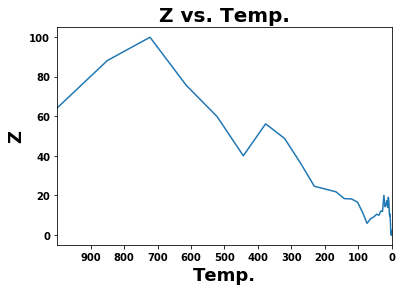

In [95]:
import numpy as np
import matplotlib.pyplot as plt



x0 = 2 # Initial solution you'd like to start at
y0 = 1

k = 0.1
T0 = 1000
M = 300
N = 15
alpha = 0.85

z_int = ((x0**2)+y0-11)**2+(x0+(y0**2)-7)**2

print("Initial X is %.3f" % x0)
print("Initial Y is %.3f" % y0)
print("Initial Z is %.3f" % z_int)


temp = []
min_z = []

for i in range(M):
    for j in range(N):
        xt = 0
        yt = 0
        
        ran_x_1 = np.random.rand()
        ran_x_2 = np.random.rand()
        ran_y_1 = np.random.rand()
        ran_y_2 = np.random.rand()
        
        if ran_x_1 >= 0.5:
            x1 = k*ran_x_2
        else:
            x1 = -k*ran_x_2
        
        if ran_y_1 >= 0.5:
            y1 = k*ran_y_2
        else:
            y1 = -k*ran_y_2
            
        xt = x0+x1
        yt = y0+y1
        
        of_new = ((xt**2)+yt-11)**2+(xt+(yt**2)-7)**2
        
        of_current = ((x0**2)+y0-11)**2+(x0+(y0**2)-7)**2
        
        
        ran_1 = np.random.rand()
        form = 1/(np.exp((of_new-of_current)/T0))
        
        if of_new <= of_current:
            x0 = xt
            y0 = yt
        elif ran_1<=form:
            x0 = xt
            y0 = yt
        else:
            x0 = x0
            y0 = y0
        
    temp = np.append(temp,T0)
    min_z = np.append(min_z,of_current)
    T0 = alpha*T0


print("X is %.3f" % x0)
print("Y is %.3f" % y0)
print("Final OF is %.3f" % of_current)

# print(min_z)
plt.plot(temp,min_z)
plt.title("Z vs. Temp.",fontsize=20, fontweight='bold')
plt.xlabel("Temp.",fontsize=18, fontweight='bold')
plt.ylabel("Z",fontsize=18, fontweight='bold')

plt.xlim(1000,0)
plt.xticks(np.arange(min(temp),max(temp),100),fontweight='bold')
plt.yticks(fontweight='bold')
